# Workshop5. Линейная регрессия. (33 балла)

> Линейная регрессия - это не повод для затяжной депрессии.

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

### Полезная литература

- [Лекция в рамках проекта deeplay[lab] про линейные модели А.Н.Шевляков](https://youtu.be/n9I5BBBZmRU)
- [Учебник ML от ШАД — линейные модели](https://ml-handbook.ru/chapters/linear_models/intro)
- Заметки из курса [Машинное обучение на ФКН ВШЭ](https://github.com/esokolov/ml-course-hse)
  - [лекция 1](99-extra__ml-course-hse__lecture02-linregr.pdf)
  - [лекция 2](99-extra__ml-course-hse__lecture03-linregr.pdf)
  - [лекция 3](99-extra__ml-course-hse__lecture04-linregr.pdf)
- [Статья про лин.рег. от ODS на habrahabr](https://habr.com/ru/company/ods/blog/323890/)

## Данные

Возьмем датасет о стоимости домов: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data.

Он лежит в `./data/house_prices.csv.gz`

```
SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
MSSubClass: The building class
MSZoning: The general zoning classification
LotFrontage: Linear feet of street connected to property
LotArea: Lot size in square feet
Street: Type of road access
Alley: Type of alley access
LotShape: General shape of property
LandContour: Flatness of the property
Utilities: Type of utilities available
LotConfig: Lot configuration
LandSlope: Slope of property
Neighborhood: Physical locations within Ames city limits
Condition1: Proximity to main road or railroad
Condition2: Proximity to main road or railroad (if a second is present)
BldgType: Type of dwelling
HouseStyle: Style of dwelling
OverallQual: Overall material and finish quality
OverallCond: Overall condition rating
YearBuilt: Original construction date
YearRemodAdd: Remodel date
RoofStyle: Type of roof
RoofMatl: Roof material
Exterior1st: Exterior covering on house
Exterior2nd: Exterior covering on house (if more than one material)
MasVnrType: Masonry veneer type
MasVnrArea: Masonry veneer area in square feet
ExterQual: Exterior material quality
ExterCond: Present condition of the material on the exterior
Foundation: Type of foundation
BsmtQual: Height of the basement
BsmtCond: General condition of the basement
BsmtExposure: Walkout or garden level basement walls
BsmtFinType1: Quality of basement finished area
BsmtFinSF1: Type 1 finished square feet
BsmtFinType2: Quality of second finished area (if present)
BsmtFinSF2: Type 2 finished square feet
BsmtUnfSF: Unfinished square feet of basement area
TotalBsmtSF: Total square feet of basement area
Heating: Type of heating
HeatingQC: Heating quality and condition
CentralAir: Central air conditioning
Electrical: Electrical system
1stFlrSF: First Floor square feet
2ndFlrSF: Second floor square feet
LowQualFinSF: Low quality finished square feet (all floors)
GrLivArea: Above grade (ground) living area square feet
BsmtFullBath: Basement full bathrooms
BsmtHalfBath: Basement half bathrooms
FullBath: Full bathrooms above grade
HalfBath: Half baths above grade
Bedroom: Number of bedrooms above basement level
Kitchen: Number of kitchens
KitchenQual: Kitchen quality
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
Functional: Home functionality rating
Fireplaces: Number of fireplaces
FireplaceQu: Fireplace quality
GarageType: Garage location
GarageYrBlt: Year garage was built
GarageFinish: Interior finish of the garage
GarageCars: Size of garage in car capacity
GarageArea: Size of garage in square feet
GarageQual: Garage quality
GarageCond: Garage condition
PavedDrive: Paved driveway
WoodDeckSF: Wood deck area in square feet
OpenPorchSF: Open porch area in square feet
EnclosedPorch: Enclosed porch area in square feet
3SsnPorch: Three season porch area in square feet
ScreenPorch: Screen porch area in square feet
PoolArea: Pool area in square feet
PoolQC: Pool quality
Fence: Fence quality
MiscFeature: Miscellaneous feature not covered in other categories
MiscVal: $Value of miscellaneous feature
MoSold: Month Sold
YrSold: Year Sold
SaleType: Type of sale
SaleCondition: Condition of sale
```

Целевой переменной будет `SalePrice`. То есть мы будем предсказывать стоимость жилья на основе его характеристик. 

In [51]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [52]:
df = pd.read_csv('./data/house_prices.csv.gz', index_col='Id')
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [53]:
assert df.shape == (1460, 80)

In [54]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

## 1.0 Анализ целевого признака (3 балла)

Удостоверимся, что раcпределение целевого признака "хорошее", без странных выбросов. В идеале мы хотим видеть нормальное распределени или достаточно похожее на него, без очень длинных "хвостов" выбросов.

_Почему требуется нормальность распределения: ищите объяснения линейной регресси через алгоритмы максимизации правдоподобия. В итоге, грубо говоря, суть сводится к тому, что с ростом объема выборки, оценка максимального правдоподобия лучше описывает нормальное распределение._

[Коэффициент эксцесса](http://www.machinelearning.ru/wiki/index.php?title=%D0%9A%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D1%8D%D0%BA%D1%81%D1%86%D0%B5%D1%81%D1%81%D0%B0) показывает степень остроты пика распределения случайной величины. Для нормального распределения он равен `0`. Если хвосты распределения «тяжелее», а пик более «приплюснутый», чем у нормального распределения, то коэффициент < 0. А если хвосты легкие, то больше 0. В нашем случае должно получиться околов `6.5`.

Задание: 
- Нарисуйте график распределения `SalePrice`, используйте аргумент `fit=scipy.stats.norm`, чтобы нарисовать предполагаемое нормальное распределение. Напечатайте значение коэффициент эксцесса `kurtosis` для этого признака.
- Нарисуйте график [scipy.stats.probplot](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.probplot.html) - он покажет нам реальные квантили выборки и теоретические. По нему можно видеть, на сколько много выьросов и на сколько выборка предсказуема.
- Что вы можете сказать по поводу выборки основываясь на `probplot`.  [wiki](https://en.wikipedia.org/wiki/Normal_probability_plot)

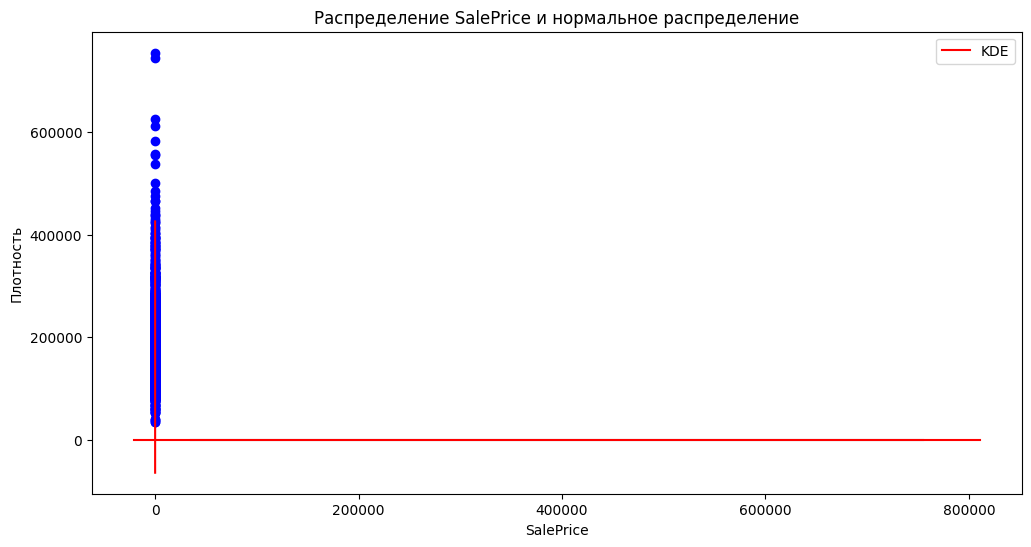

Коэффициент эксцесса: 6.509812011089439


In [58]:
from scipy import stats
plt.figure(figsize=(12, 6))
sns.histplot(df['SalePrice'], kde=True, stat="density", linewidth=0)
sns.kdeplot(df['SalePrice'], color='r', label='KDE')
stats.probplot(df['SalePrice'], dist="norm", plot=plt)
plt.title('Распределение SalePrice и нормальное распределение')
plt.xlabel('SalePrice')
plt.ylabel('Плотность')
plt.legend()
plt.show()

kurtosis = stats.kurtosis(df['SalePrice'])
print(f"Коэффициент эксцесса: {kurtosis}")


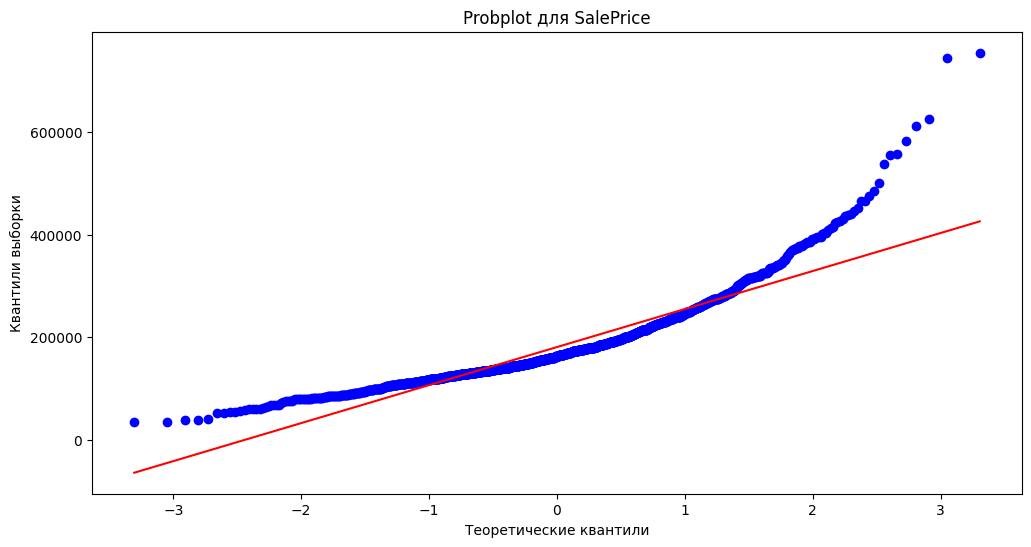

In [59]:
plt.figure(figsize=(12, 6))
stats.probplot(df['SalePrice'], dist="norm", plot=plt)
plt.title('Probplot для SalePrice')
plt.xlabel('Теоретические квантили')
plt.ylabel('Квантили выборки')
plt.show()

## 1.2 Анализ некоторых зависимостей (3 балла)

У нас очень много разных признаков. Любопытно построить разные графики. Позаботьтесь о красоте и наглядности графиков, сделайте так, чтобы они были большими и их можно было прочесть. Даже подписи на графиках должны быть читаемые!!

Задания: Постройте графики, отражающие зависимости этих признаков:
- дата постройки дома и его стоимости
- "качество дома и материалов" и его стоимости
- площадь дома и стоимость

Hints: Вспомните про boxplot, jointplot, lmplot...

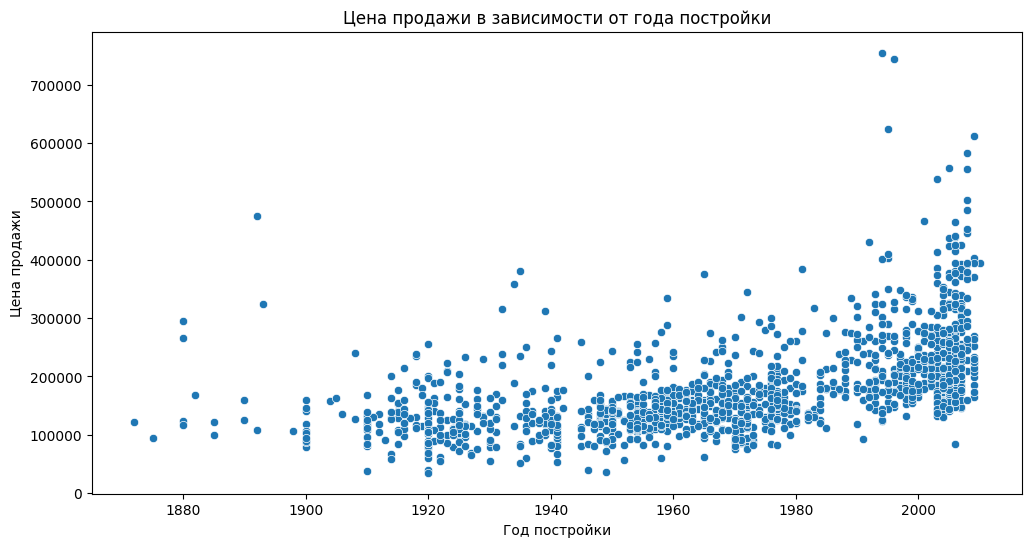

In [60]:

plt.figure(figsize=(12, 6))
sns.scatterplot(x='YearBuilt', y='SalePrice', data=df)
plt.title('Цена продажи в зависимости от года постройки')
plt.xlabel('Год постройки')
plt.ylabel('Цена продажи')
plt.show()


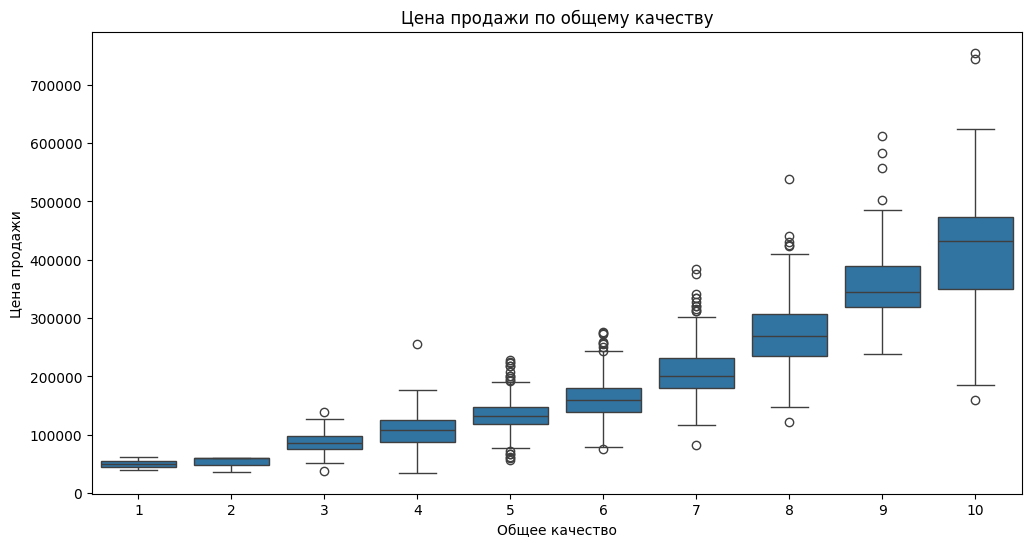

In [61]:

plt.figure(figsize=(12, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=df)
plt.title('Цена продажи по общему качеству')
plt.xlabel('Общее качество')
plt.ylabel('Цена продажи')
plt.show()

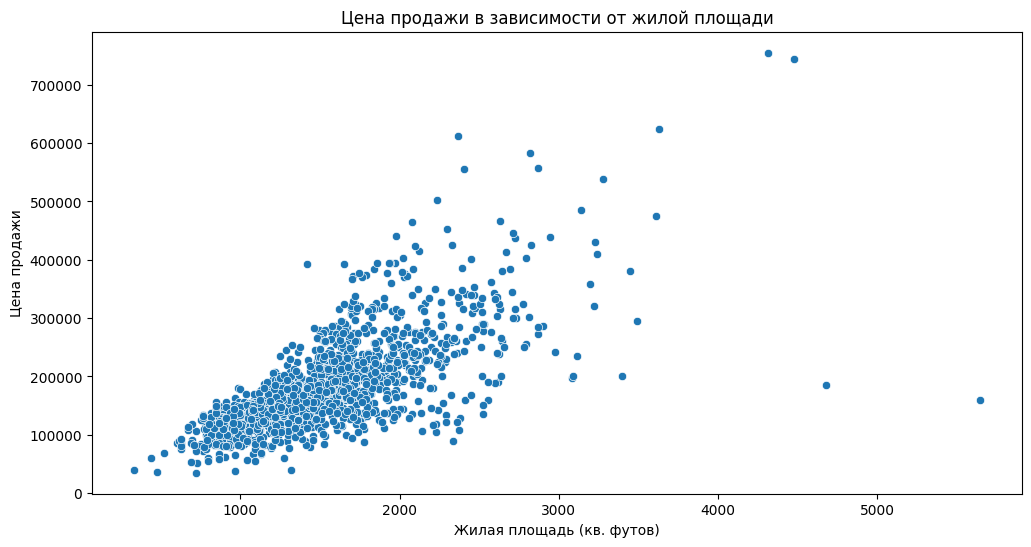

In [62]:

plt.figure(figsize=(12, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.title('Цена продажи в зависимости от жилой площади')
plt.xlabel('Жилая площадь (кв. футов)')
plt.ylabel('Цена продажи')
plt.show()


## 1.2 Heatmap (3 балла)

Судя по предыдущим графикам, есть некоторые линейные зависимости. Но строить по графику на каждый признак из 80 штук немного долго и не наглядно. Постройте красивый график корреляции всех признаков. Используйте цвета `RdYlGn`, так будет нагляднее. Не забудьте применить маску, чтобы убрать дублирующую половину матрицы.

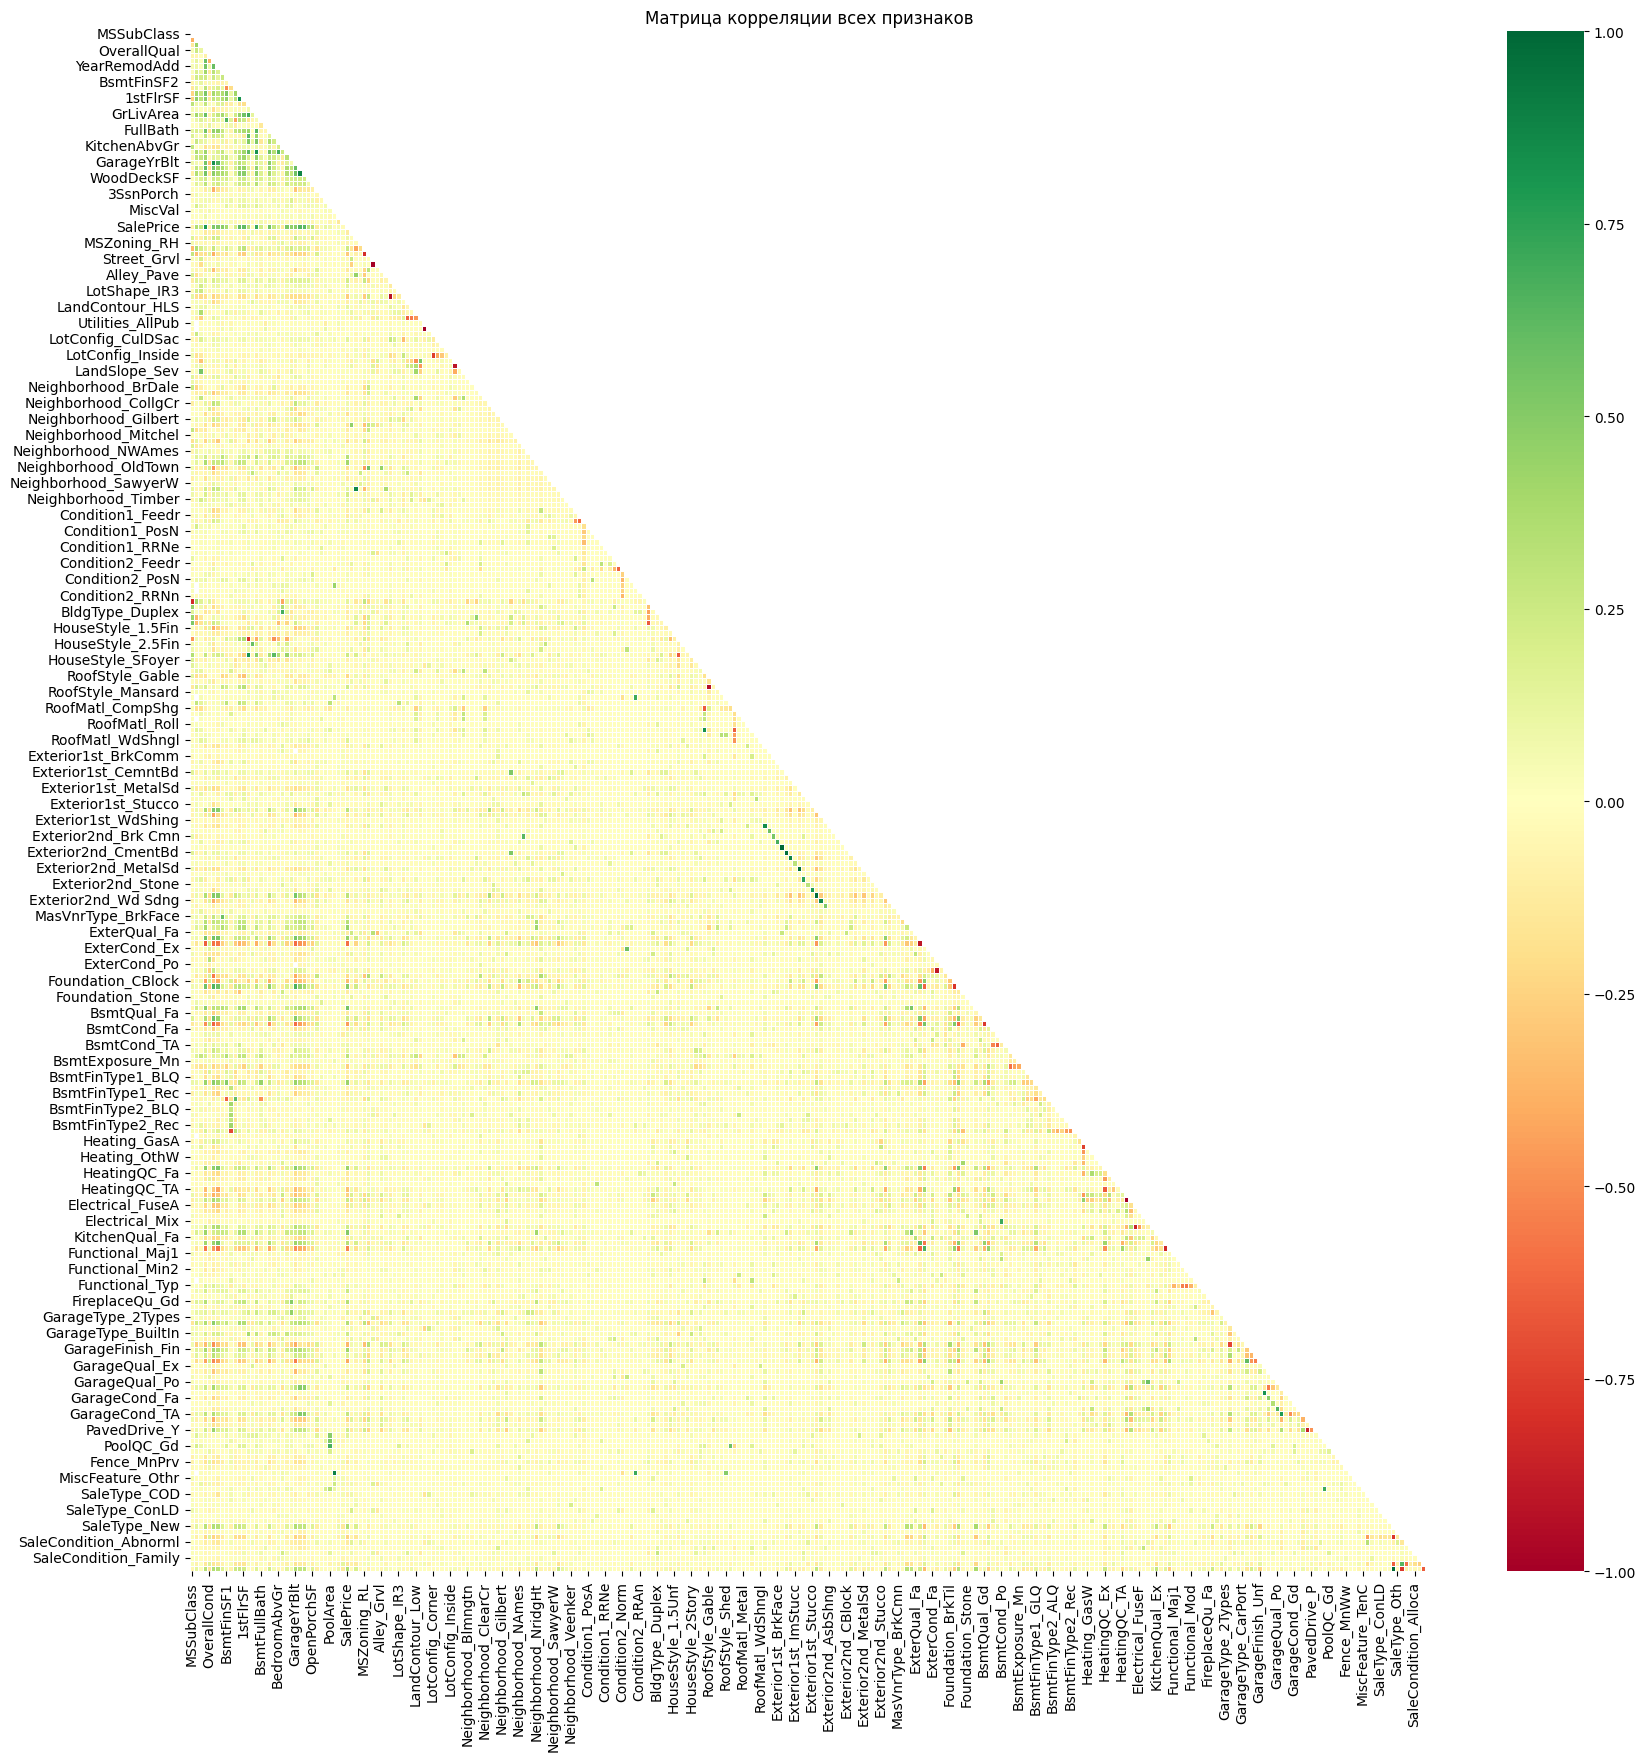

In [63]:
import seaborn as sns

df_numeric = pd.get_dummies(df)

corr_matrix = df_numeric.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, mask=mask, cmap='RdYlGn', annot=False, linewidths=0.5)
plt.title('Матрица корреляции всех признаков')
plt.show()


Большая матрица 38x38 ячеек. И мы видим, там есть сильно коррелируемые объекты с нашей целевой переменной. 

- Нарисуйте крупно heatmap этих сильно коррелируемых объектов( больше 0.5 по абсолютному значению) и сделайте так, чтобы в каждой ячейке было значение корреляции. 
- Выведите список этих сильно коррелируемых признаков.
- Желательно сделать heatmap диагональной матрицей, чтобы было красиво (в теории был пример)

Запомним эти признаки!

Сильно коррелируемые признаки:
 Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice', 'ExterQual_TA', 'BsmtQual_Ex', 'KitchenQual_Ex',
       'KitchenQual_TA'],
      dtype='object')


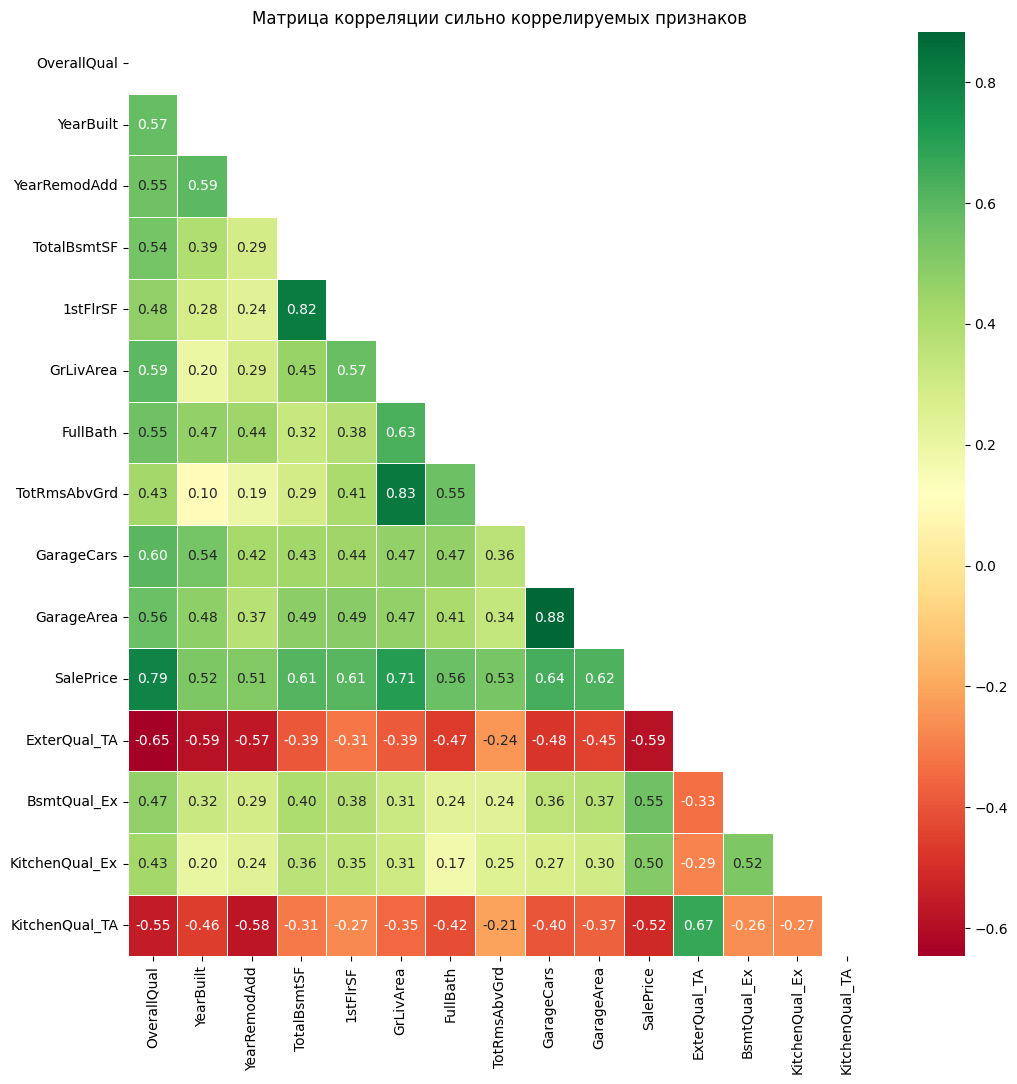

In [64]:
strong_corr = corr_matrix[abs(corr_matrix["SalePrice"]) > 0.5].index
print("Сильно коррелируемые признаки:\n", strong_corr)

strong_corr_matrix = corr_matrix.loc[strong_corr, strong_corr]

mask = np.triu(np.ones_like(strong_corr_matrix, dtype=bool))

plt.figure(figsize=(12, 12))
sns.heatmap(strong_corr_matrix, mask=mask, cmap='RdYlGn', annot=True, fmt='.2f', linewidths=0.5)
plt.title('Матрица корреляции сильно коррелируемых признаков')
plt.show()

## 1.3 Пропущеные данные (3 балла)

Задание:
 - Посчитайте общее количество пропущенных данных по каждому признаку
 - посчитайте долю пропущенных данных выборки
 - удалите из выборки признаки, доля пропущенных которых больще 10%
 - пропущенные категориальные заполните словом 'unknown' (у них dtype object)
 - пропущенные числовые заполните средним (у них dtype float)

Hinst: https://stackoverflow.com/a/38134049/3205200

In [65]:

missing_values_count = df.isnull().sum()
print(missing_values_count)


MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [72]:

missing_values_ratio = df.isnull().mean() * 100
print(missing_values_ratio)


MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
Alley            0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath 

In [73]:
df.loc[:, missing_values_ratio <= 10]
print(f"Оставлено признаков: {df.shape[1]}")


Оставлено признаков: 80


In [74]:

df.loc[:, df.select_dtypes(include=['object']).columns] = \
    df.select_dtypes(include=['object']).fillna('unknown')


In [75]:

print(df['LotFrontage'].dtype)

float64


In [76]:


df.loc[:, df.select_dtypes(include=[float, int]).columns] = \
    df.select_dtypes(include=[float, int]).fillna(df.select_dtypes(include=[float, int]).mean())


In [77]:

print(df['LotFrontage'].isnull().sum())


0


## 1.4 Категориальные переменные (1 балл)

На сколько вы помните, линейная регрессия не умеет обрабатывать категориальные признаки, так как ей нужны ЧИСЛА. Но не беда, в pandas есть встроенная функция [get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Задание:
- сконвертируйте все категориальные признаки(dtype=object) в вектора числовых с помощью get_dummies
- напечатайте сколько у вас теперь признаков
- Положите в переменную X все данные из датасета, кроме целевой переменной. Положите в переменную y только целевую переменную.

In [78]:

df_dummies = pd.get_dummies(df)

print(f"Количество признаков после преобразования: {df_dummies.shape[1]}")

X = df_dummies.drop(columns=['SalePrice'])

y = df_dummies['SalePrice']

print(f"Размерность X: {X.shape}")
print(f"Размерность y: {y.shape}")


Количество признаков после преобразования: 304
Размерность X: (1460, 303)
Размерность y: (1460,)


## 1.5 Переобучение (3 балла)

Обучим обычную модель без регуляризации [sklearn.linear_model.LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

- Выведите все коэффициенты для каждого признака, отсортировав по возрастанию по модулю значения коэффициента. Используйте print и for, иначе jupyter схлопнет вывод numpy массива. Можете округлить коэффициенты до 2 знаков после запятой.
- Выведите **среднее** ошибки предсказания на 5 фолдах (cv=5) для этой линейной регрессии с помощью функции [sklearn.model_selection.cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html). Укажите `scoring='neg_mean_squared_error'`, чтобы считалась [MSE](http://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error)

In [79]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

pd.set_option('display.max_rows', None)

model = LinearRegression()
model.fit(X, y)

coefficients = pd.Series(model.coef_, index=X.columns).sort_values()
print(coefficients)

mse_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Средняя ошибка предсказания (MSE): {-mse_scores.mean()}")

roof_style_shed_coef = coefficients.get("RoofStyle_Shed", "Признак 'RoofStyle_Shed' не найден")
print(f"Коэффициент для RoofStyle_Shed: {roof_style_shed_coef}")


RoofMatl_ClyTile        -526912.663659
Condition2_PosN         -193159.741609
PoolQC_Fa               -150597.725873
PoolQC_Gd               -120380.121042
GarageCond_Ex            -91331.781671
Condition2_RRAe          -81338.798535
GarageQual_Po            -41823.631108
Functional_Sev           -37822.275158
Electrical_Mix           -34673.382130
LandSlope_Sev            -29845.929871
RoofStyle_Flat           -25215.213871
Foundation_Wood          -24433.937581
GarageQual_Fa            -24301.515739
Exterior2nd_Other        -22836.700683
Condition1_RRAe          -21218.140353
MSZoning_C (all)         -20390.479890
BsmtCond_Gd              -19430.606399
BsmtCond_Fa              -19340.812706
GarageQual_Gd            -19282.820820
GarageType_2Types        -18926.641348
Utilities_NoSeWa         -18536.869873
Neighborhood_Edwards     -18481.405108
GarageQual_TA            -18257.032697
Neighborhood_Mitchel     -18033.689512
BsmtFinType2_unknown     -17708.658081
BsmtCond_TA              

К счастью в этот раз коэффициенты при признаках не улетели в космос, но всё равно достигли очень больших значений. Например `RoofStyle_Shed` получился в моем случае около `-514961`. А у некоторых признаков коэффициент уже равен 0, хотя не была применена регуляризация.

## 1.6 Ridge и Lasso (4 балла)

- Обучите Lasso и Ridge для разных значений регуляризации alpha
- нарисуйте график значений коэффициентов модели для каждого признака, как мы делали на практике. По оси X будет значение alpha, по Y - значение коэффициента. на графике будет "радуга" из линий разных цветов(линий столько, сколько признаков).
- Нарисуйте гистограмму, в которой по оси Y будет количество коэффициентов, равных 0 (<0.0001) для Loss регресиии, а по оси X - значение коэффициента альфа.

alpha взять от 1 до 500 с каким-нибудь шагом. Но не переборщите, а то долго будете ждать.

In [80]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

alphas = np.arange(1, 501, 10)
lasso_coefs = []
ridge_coefs = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_scaled, y)
    lasso_coefs.append(lasso.coef_)

    ridge = Ridge(alpha=alpha, max_iter=10000)
    ridge.fit(X_scaled, y)
    ridge_coefs.append(ridge.coef_)

# Преобразуем в массивы для удобства
lasso_coefs = np.array(lasso_coefs)
ridge_coefs = np.array(ridge_coefs)




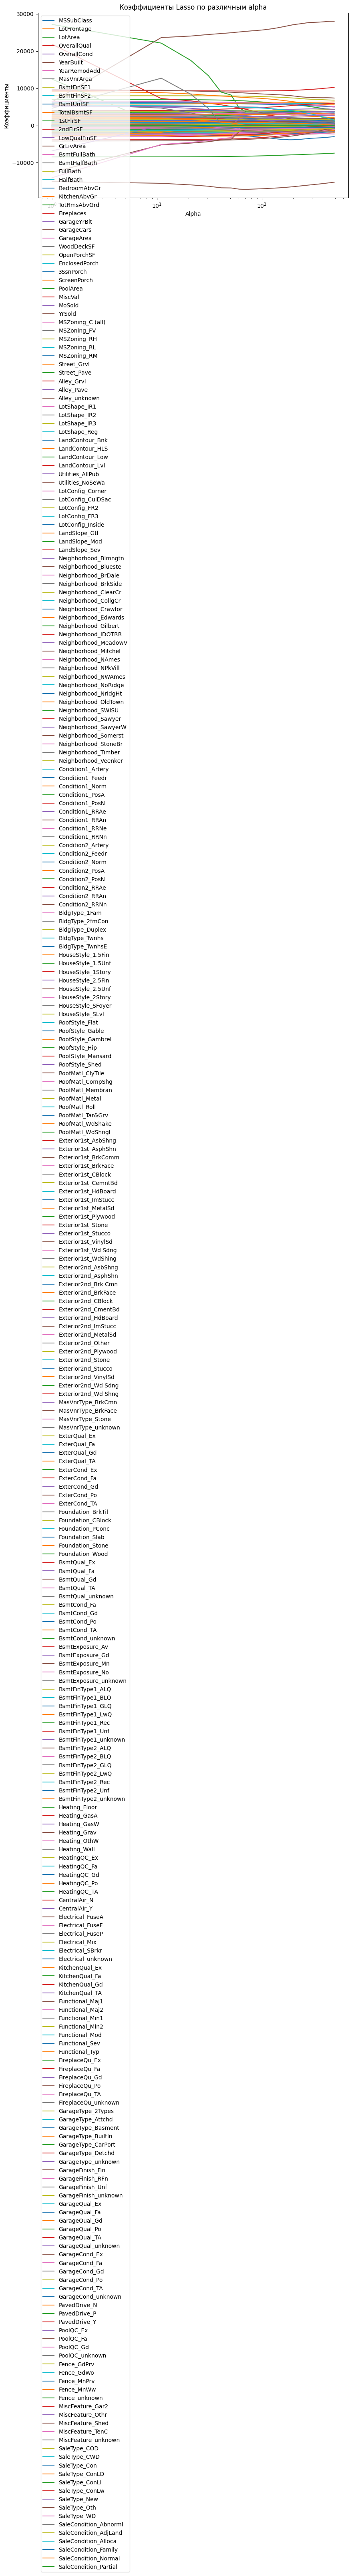

In [81]:

plt.figure(figsize=(10, 6))
for i in range(lasso_coefs.shape[1]):
    plt.plot(alphas, lasso_coefs[:, i], label=X.columns[i])
plt.title('Коэффициенты Lasso по различным alpha')
plt.xlabel('Alpha')
plt.ylabel('Коэффициенты')
plt.legend()
plt.xscale('log')
plt.show()



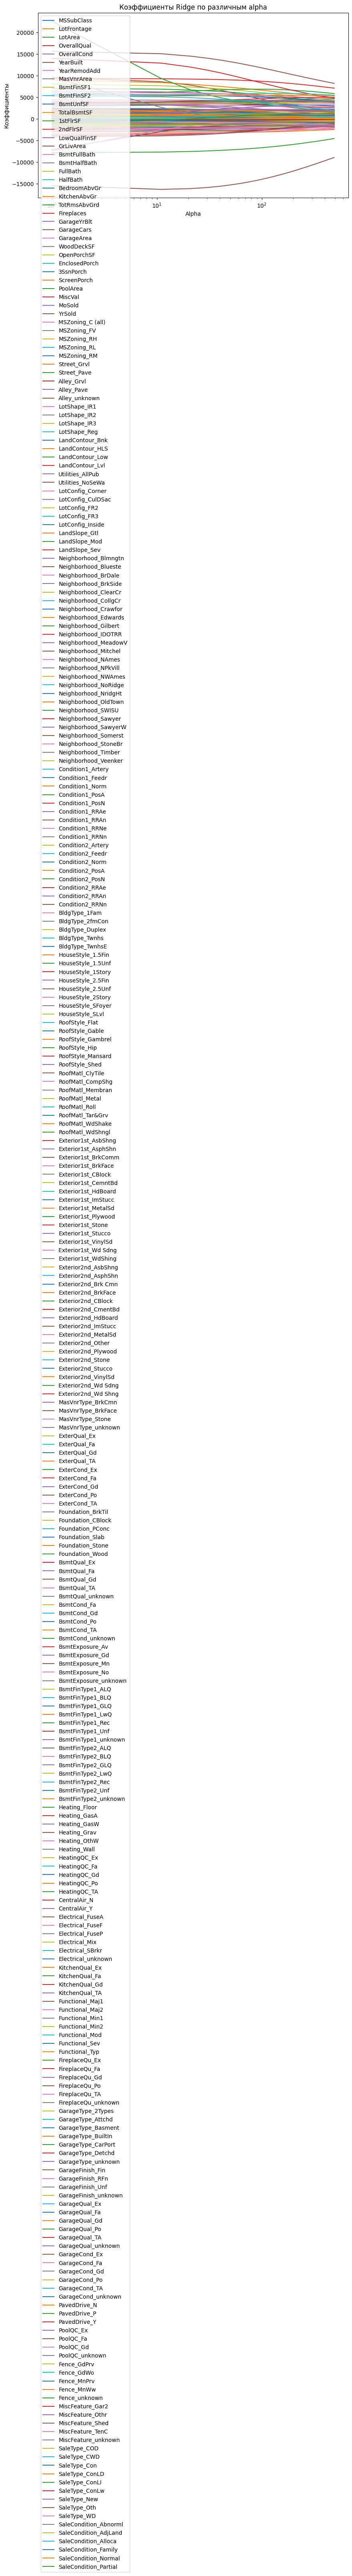

In [82]:
plt.figure(figsize=(10, 6))
for i in range(ridge_coefs.shape[1]):
    plt.plot(alphas, ridge_coefs[:, i], label=X.columns[i])
plt.title('Коэффициенты Ridge по различным alpha')
plt.xlabel('Alpha')
plt.ylabel('Коэффициенты')
plt.legend()
plt.xscale('log')
plt.show()

## 1.7 Поиск оптимального alpha (6 баллов)

- С помощью метода LassoCV найдите оптимальное значение alpha и напечатайте его, используя разбиение на 5 фолда в кроссвалидации (`cv=5`).
- Нарисуйте график зависимости MSE от alpha (`mse_path_`).
- Нарисуйте длинную гистограмму магнитуда признаков, как в классе, на которой будет показано значение коэффициента для каждого признака. Графк должен быть остортирован по величине коэффициентов. Признаки с нулевыми коэффициентами должны быть удалены.
- Сколько в итоге ненулевых признаков осталось?
- Выведите **среднее** ошибки предсказания на 5 фолдах (cv=5) для этой линейной регрессии с помощью функции [sklearn.model_selection.cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html). Укажите `scoring='neg_mean_squared_error'`, чтобы считалась [MSE](http://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error). Качество должно быть лучше, чем у простой линейной регрессии.

In [83]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(cv=5, random_state=0)
lasso_cv.fit(X, y)

print(f"Оптимальное значение alpha: {lasso_cv.alpha_}")




Оптимальное значение alpha: 209067.7746829921


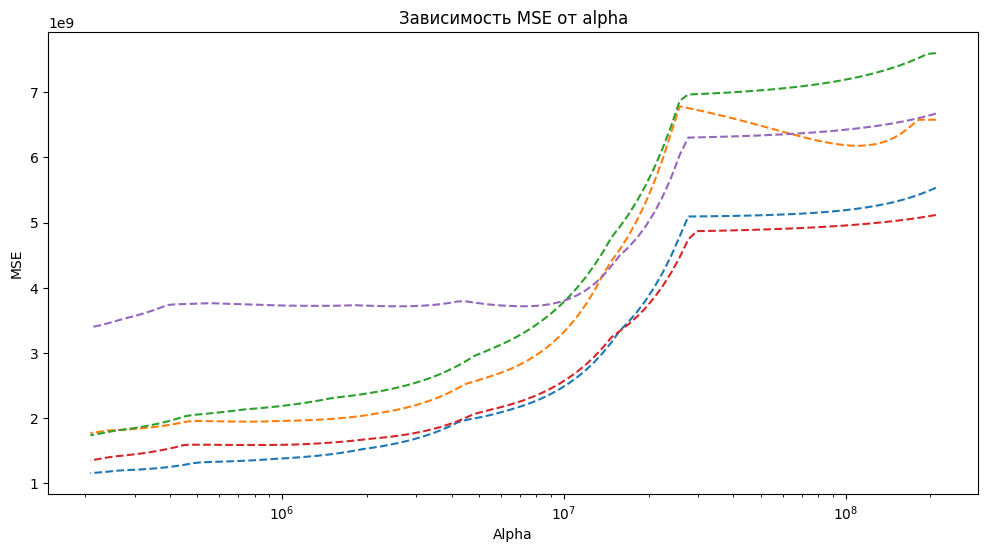

In [84]:
# График зависимости MSE от alpha
mse_path = lasso_cv.mse_path_
plt.figure(figsize=(12, 6))
plt.plot(lasso_cv.alphas_, mse_path, linestyle='--')
plt.title('Зависимость MSE от alpha')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.xscale('log')
plt.show()


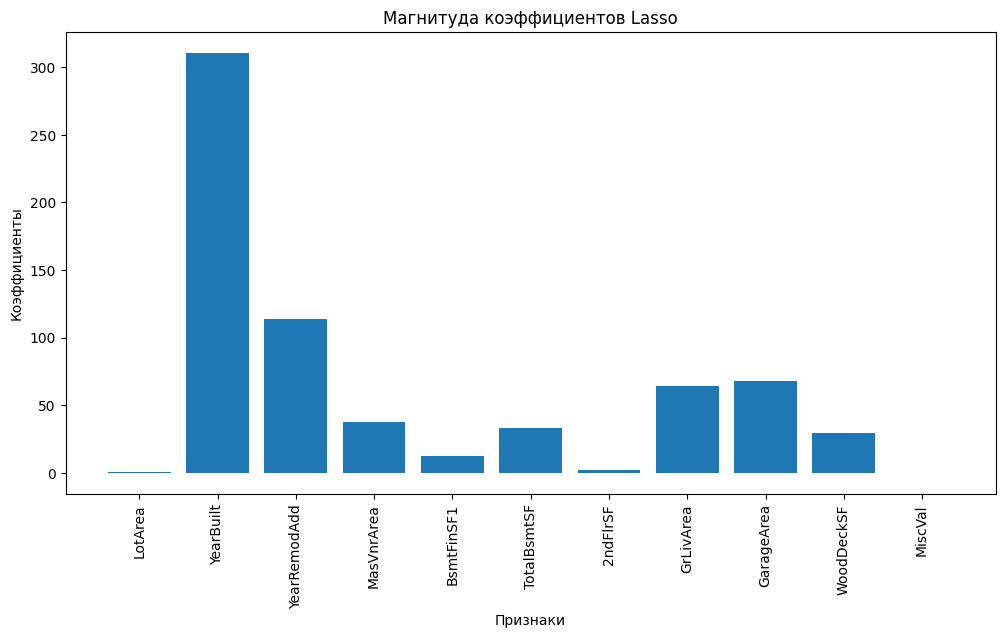

In [85]:

coeffs = lasso_cv.coef_
non_zero_coeffs = coeffs[coeffs != 0]
plt.figure(figsize=(12, 6))
plt.bar(range(len(non_zero_coeffs)), non_zero_coeffs)
plt.title('Магнитуда коэффициентов Lasso')
plt.xlabel('Признаки')
plt.ylabel('Коэффициенты')
plt.xticks(range(len(non_zero_coeffs)), X.columns[coeffs != 0], rotation=90)
plt.show()


In [88]:

print(f"Количество ненулевых признаков: {np.sum(coeffs != 0)}")



Количество ненулевых признаков: 11


In [89]:

mse_scores_lasso = cross_val_score(lasso_cv, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Средняя ошибка предсказания (MSE) для Lasso: {-mse_scores_lasso.mean()}")

Средняя ошибка предсказания (MSE) для Lasso: 1885747498.7704964


## 1.8 Предсказание на отложенной выборке (3 балла)

- Используя [sklearn.model_selection.train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) разбейте датасет на 2 части - тренировочную и тестовую в соотношении 0.33. Не забудьте перемешать!
- Напечатайте размерность X_train и X_test

In [90]:
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)

print(f"Размерность X_train: {X_train.shape}")
print(f"Размерность X_test: {X_test.shape}")


Размерность X_train: (978, 303)
Размерность X_test: (482, 303)


Теперь, возьмите вашу самую мощную модель(не тренированную!). Запустите её тренировку по тренировочной выборке X_train, y_train с помощью функции `fit`. Постройте предсказания с помощью функции `predict`.

In [91]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)


Визуализируйте scatter plot предсказанных значений и настоящих (`y_test`). У вас должен получиться график, точки которого расположены приблизительно вдоль некоторой прямой с разбросом. Идеальный предсказатель будет выглядить как набор точек вдоль прямой без разброса.

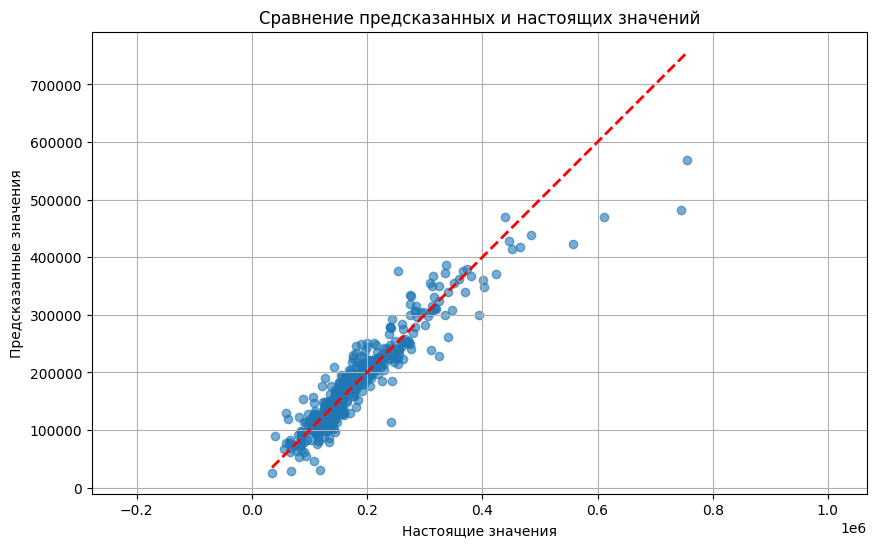

In [92]:
# Визуализация
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2) 
plt.title('Сравнение предсказанных и настоящих значений')
plt.xlabel('Настоящие значения')
plt.ylabel('Предсказанные значения')
plt.axis('equal') 
plt.grid()
plt.show()

## 1.9 Ограниченная версия ( 4 балла)

Помните в самом начале мы оставили очень мало признаков по данным из heatmap. Настало время проверить как он себя покажет! К счастью они все сразу числовые, а не категориальные. Переиспользуйте тот дадасет, где вы уже поборолись с пропусками.
Снова выделите отдельно X и y и запустите кроссвалидацию c 5 фолдами по Lasso с `alpha=1`.

In [93]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline


X = df.drop(columns=['SalePrice'])
y = df['SalePrice']

print("Проверка на наличие пропущенных значений:")
print(X.isnull().sum())

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=1, max_iter=10000))
])

mse_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

mean_mse = -mse_scores.mean()
print("Среднее значение MSE:", mean_mse)

Проверка на наличие пропущенных значений:
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomA

Можете посмотреть еще много разных примеров обработки этого датасета тут: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/kernels

А суть всего этого такова, что в итоге надо кучу времени потратить на подготовку признаков. Смотреть на кучу графиков а потом стакать модели.